In [1]:
import sys
import pandas as pd
import numpy as np

 
df=pd.read_csv('../xdr_data.csv')

<h1>Data Screening</h1>

In [2]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [5]:
df.shape

(150001, 55)

In [6]:
df.columns


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [7]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

<h1>Handling Missing Data</h1>

In [8]:
#Check for duplicates
df.duplicated().sum()

0

In [9]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.prod(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The dataset contains 12.5 % missing values.


In [10]:
#How many missing value in each column
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [11]:
#How many missing value in each column in percentage
def percent_missing(df):
    # Calculate total number of cells in dataframe
    total_cells = np.prod(df.shape)

    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Count number of missing values in the current column
        missing_count = df[column].isnull().sum()

        # Calculate percentage of missing values in the current column
        missing_percentage = (missing_count / total_cells) * 100

        # Print the percentage of missing values for the current column
        print(f"The \"{column}\" column contains {missing_percentage:.2f}% missing values.")

# Call the function to print the percentage of missing values for each column
percent_missing(df)



The "Bearer Id" column contains 0.01% missing values.
The "Start" column contains 0.00% missing values.
The "Start ms" column contains 0.00% missing values.
The "End" column contains 0.00% missing values.
The "End ms" column contains 0.00% missing values.
The "Dur. (ms)" column contains 0.00% missing values.
The "IMSI" column contains 0.01% missing values.
The "MSISDN/Number" column contains 0.01% missing values.
The "IMEI" column contains 0.01% missing values.
The "Last Location Name" column contains 0.01% missing values.
The "Avg RTT DL (ms)" column contains 0.34% missing values.
The "Avg RTT UL (ms)" column contains 0.34% missing values.
The "Avg Bearer TP DL (kbps)" column contains 0.00% missing values.
The "Avg Bearer TP UL (kbps)" column contains 0.00% missing values.
The "TCP DL Retrans. Vol (Bytes)" column contains 1.07% missing values.
The "TCP UL Retrans. Vol (Bytes)" column contains 1.17% missing values.
The "DL TP < 50 Kbps (%)" column contains 0.01% missing values.
The "50

<p>Before removing Nan values lets visualize the skewness </p>

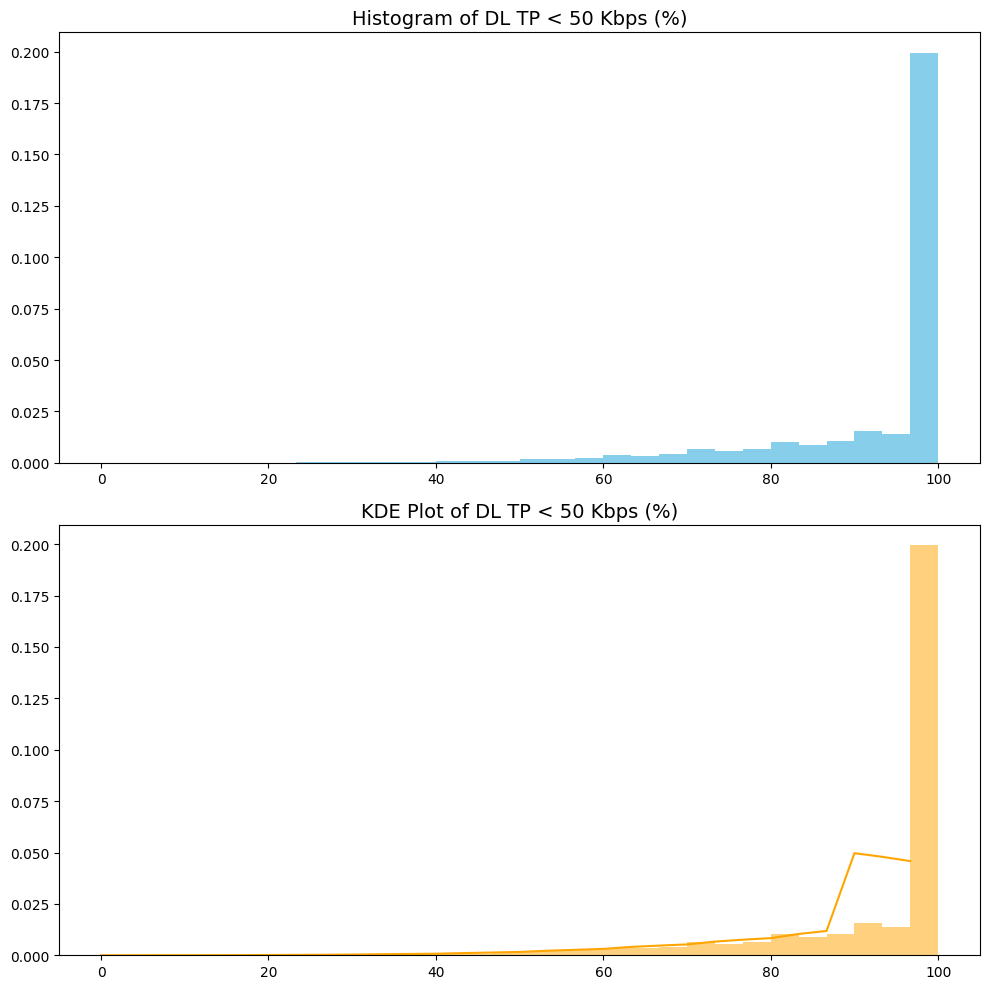

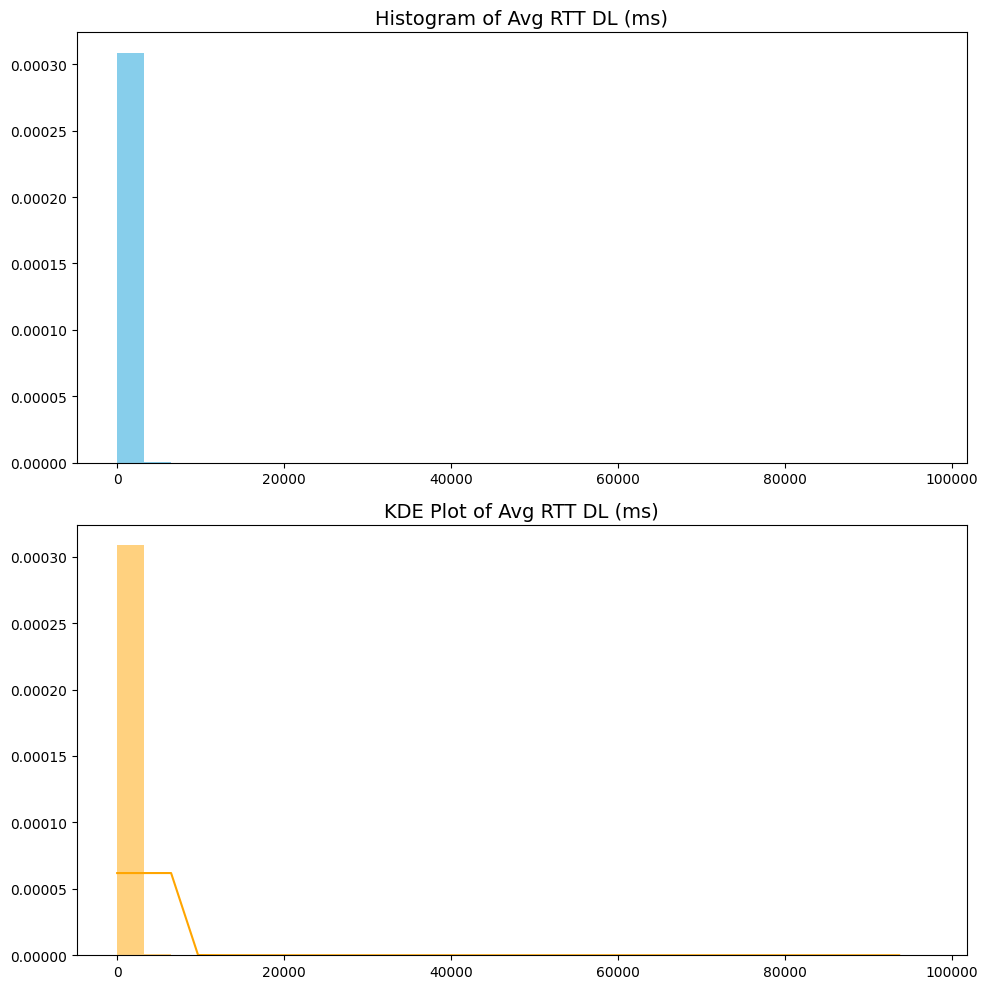

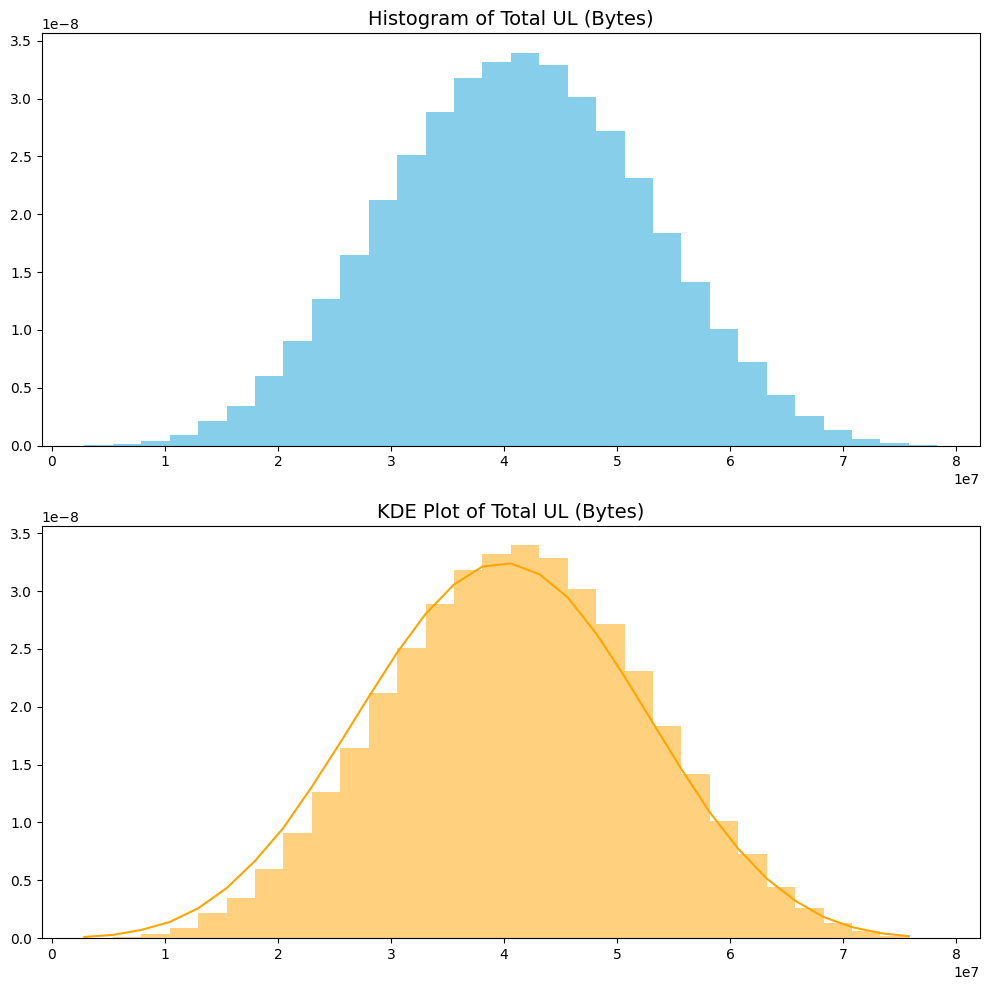

In [12]:
import numpy as np
import matplotlib.pyplot as plt

columns_to_plot = ['DL TP < 50 Kbps (%)', 'Avg RTT DL (ms)', 'Total UL (Bytes)']

for column in columns_to_plot:
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    
    # Histogram
    axes[0].hist(df[column], bins=30, color='skyblue', density=True)
    axes[0].set_title(f'Histogram of {column}', fontsize=14)
    
    # KDE Plot (Kernel Density Estimate)
    density, bins, _ = axes[1].hist(df[column], bins=30, color='orange', density=True, alpha=0.5)
    kde = np.convolve(density, np.ones(5) / 5, mode='same')
    axes[1].plot(bins[:-1], kde, color='orange')
    axes[1].set_title(f'KDE Plot of {column}', fontsize=14)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()


<p>Based of the information we gathered on missing data perscentage of it and for what use each column is going to be put we will be dropping acrioss both column and row ,imputing with mean ,median or mode and filling NaN with zero using functions and directly operationg on the single column.  </p>

In [13]:
# Dropping rows with missing values in the specified columns
df.dropna(subset=['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI','Last Location Name'], inplace=True)


In [14]:
#Total UL (Bytes), Total DL (Bytes): These columns represent total upload and download data volume and are crucial. 
#So delete only along the row
df.dropna(subset=['Total UL (Bytes)', 'Total DL (Bytes)', 'MSISDN/Number',], axis=0, inplace=True)


In [15]:
# Last Location Name: Tentatively dropping these column as it may be useful later on
# df.drop(columns=['Last Location Name'], inplace=True)

In [16]:
# TCP DL Retrans. Vol (Bytes), TCP UL Retrans. Vol (Bytes), HTTP DL (Bytes), HTTP UL (Bytes)
# These columns represent volume data and have many missing values.
# So we will impute missing values with zeros (thinking that missing values indicate HTTP traffic.)

df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(0)
df['TCP UL Retrans. Vol (Bytes)'] = df['TCP UL Retrans. Vol (Bytes)'].fillna(0)
df['HTTP DL (Bytes)'] = df['HTTP DL (Bytes)'].fillna(0)
df['HTTP UL (Bytes)'] = df['HTTP UL (Bytes)'].fillna(0)



In [17]:
#Impute missing values so we need to check the skewness and based on that we will choose either to impute using mean /median

columns_to_impute = ['DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', 
                     '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 
                     'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', 
                     '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
                     'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                     'Avg Bearer TP UL (kbps)']

def fill_missing_with_mean_or_median(column):
    skewness = df[column].skew()
    if abs(skewness) < 0.5:  # Not significantly skewed
        fill_value = df[column].mean()
    else:  # Significantly skewed
        fill_value = df[column].median()
    df[column]=df[column].fillna(fill_value)

for column in columns_to_impute:
    fill_missing_with_mean_or_median(column)


In [18]:
# Fill missing values in 'Handset Manufacturer' with the mode (most frequent value)
#Using the mode ensures that we maintain the integrity of the categorical data
df['Handset Manufacturer']=df['Handset Manufacturer'].fillna(df['Handset Manufacturer'].mode()[0])
df['Handset Type']=df['Handset Type'].fillna(df['Handset Type'].mode()[0])


In [19]:
# Fill missing values in network volume data columns with zeros
# Using zeros as the missing values might indicate periods where there was no recorded activity.
network_volume_columns = ['Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
                          'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL',
                          'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B',
                          'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']

df[network_volume_columns] = df[network_volume_columns].fillna(0)


In [20]:
df.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [21]:

# Checking if all data was handled
missing_values_count = df.isnull().sum().sum()
if missing_values_count == 0:
    print("All missing values have been filled.")
else:
    print(f"There are {missing_values_count} missing values remaining.")


All missing values have been filled.


<h3>Handling outliers</h3>

In [22]:
df.shape

(148346, 55)

Box plots visualizing the distribution of values for each numerical columns to se the outliers properly


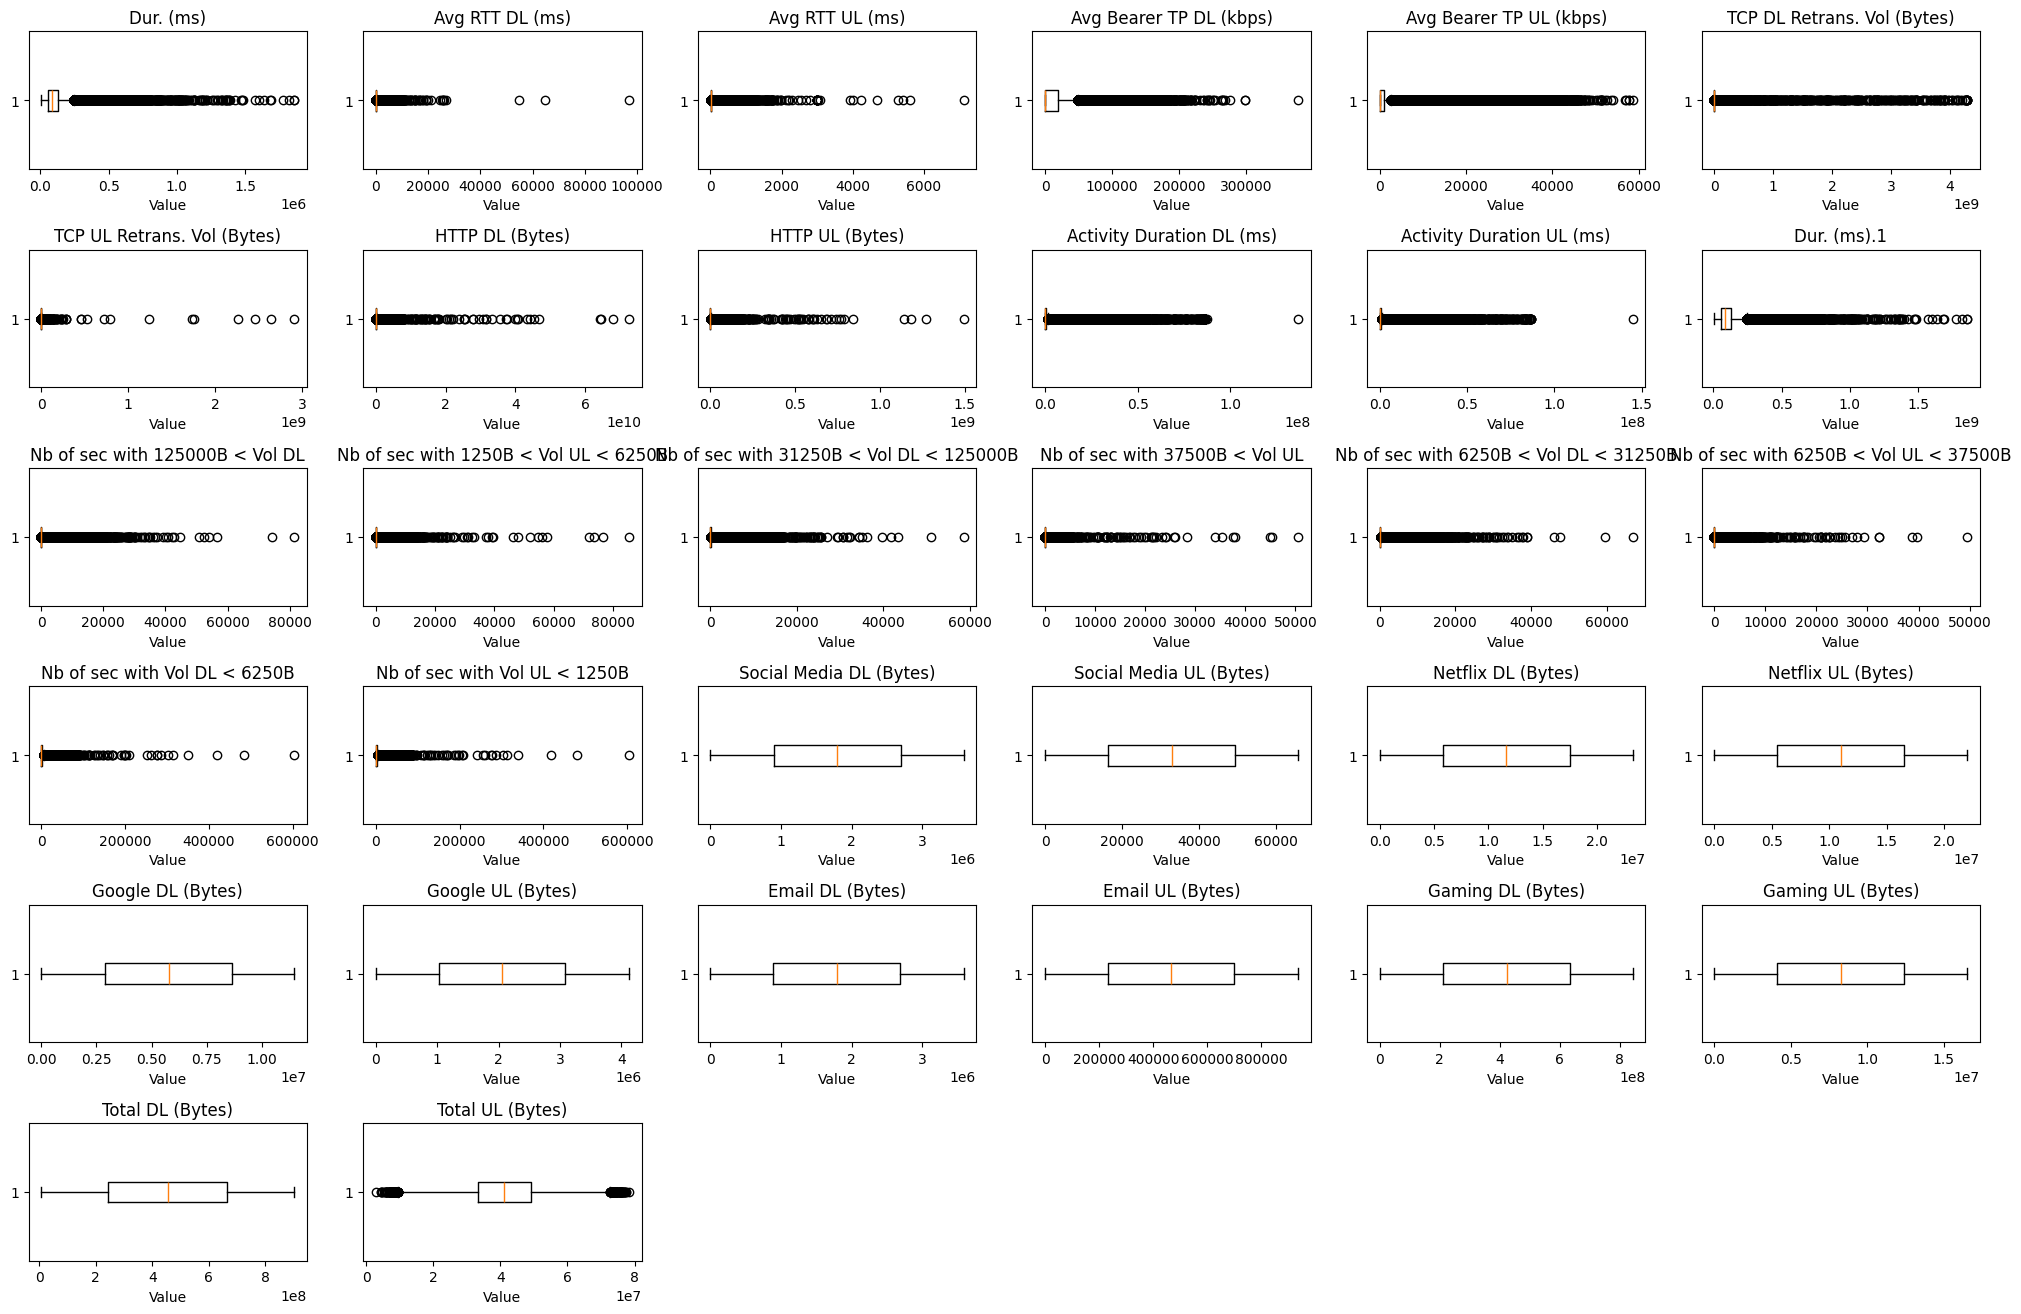

In [23]:
import matplotlib.pyplot as plt

# Define the numerical columns for plotting
numerical_columns = ['Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
                     'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 
                     'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                     'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 
                     'Activity Duration UL (ms)', 'Dur. (ms).1', 
                     'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
                     'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL',
                     'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B',
                     'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
                     'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                     'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                     'Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 
                     'Gaming UL (Bytes)',  'Total DL (Bytes)', 
                     'Total UL (Bytes)']

# Plot box plots for each numerical column
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(7, 6, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()


finding outliers using th  z-score method and handling outliers using linear interpolation because the relationship between data in columns is approximately linear.

In [24]:
from scipy import stats
import numpy as np

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number)

# Calculate z-scores for numeric columns
z_scores = np.abs(stats.zscore(numeric_cols))

# Set threshold for outlier detection
threshold = 3

# Find outliers
outliers = np.where(z_scores > threshold)

df.iloc[outliers] = np.nan

df.interpolate(method='linear', inplace=True)

df.shape



C:\Users\dell\AppData\Local\Temp\ipykernel_19440\3850761078.py:18: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


(148346, 55)

Plot After handling outliers

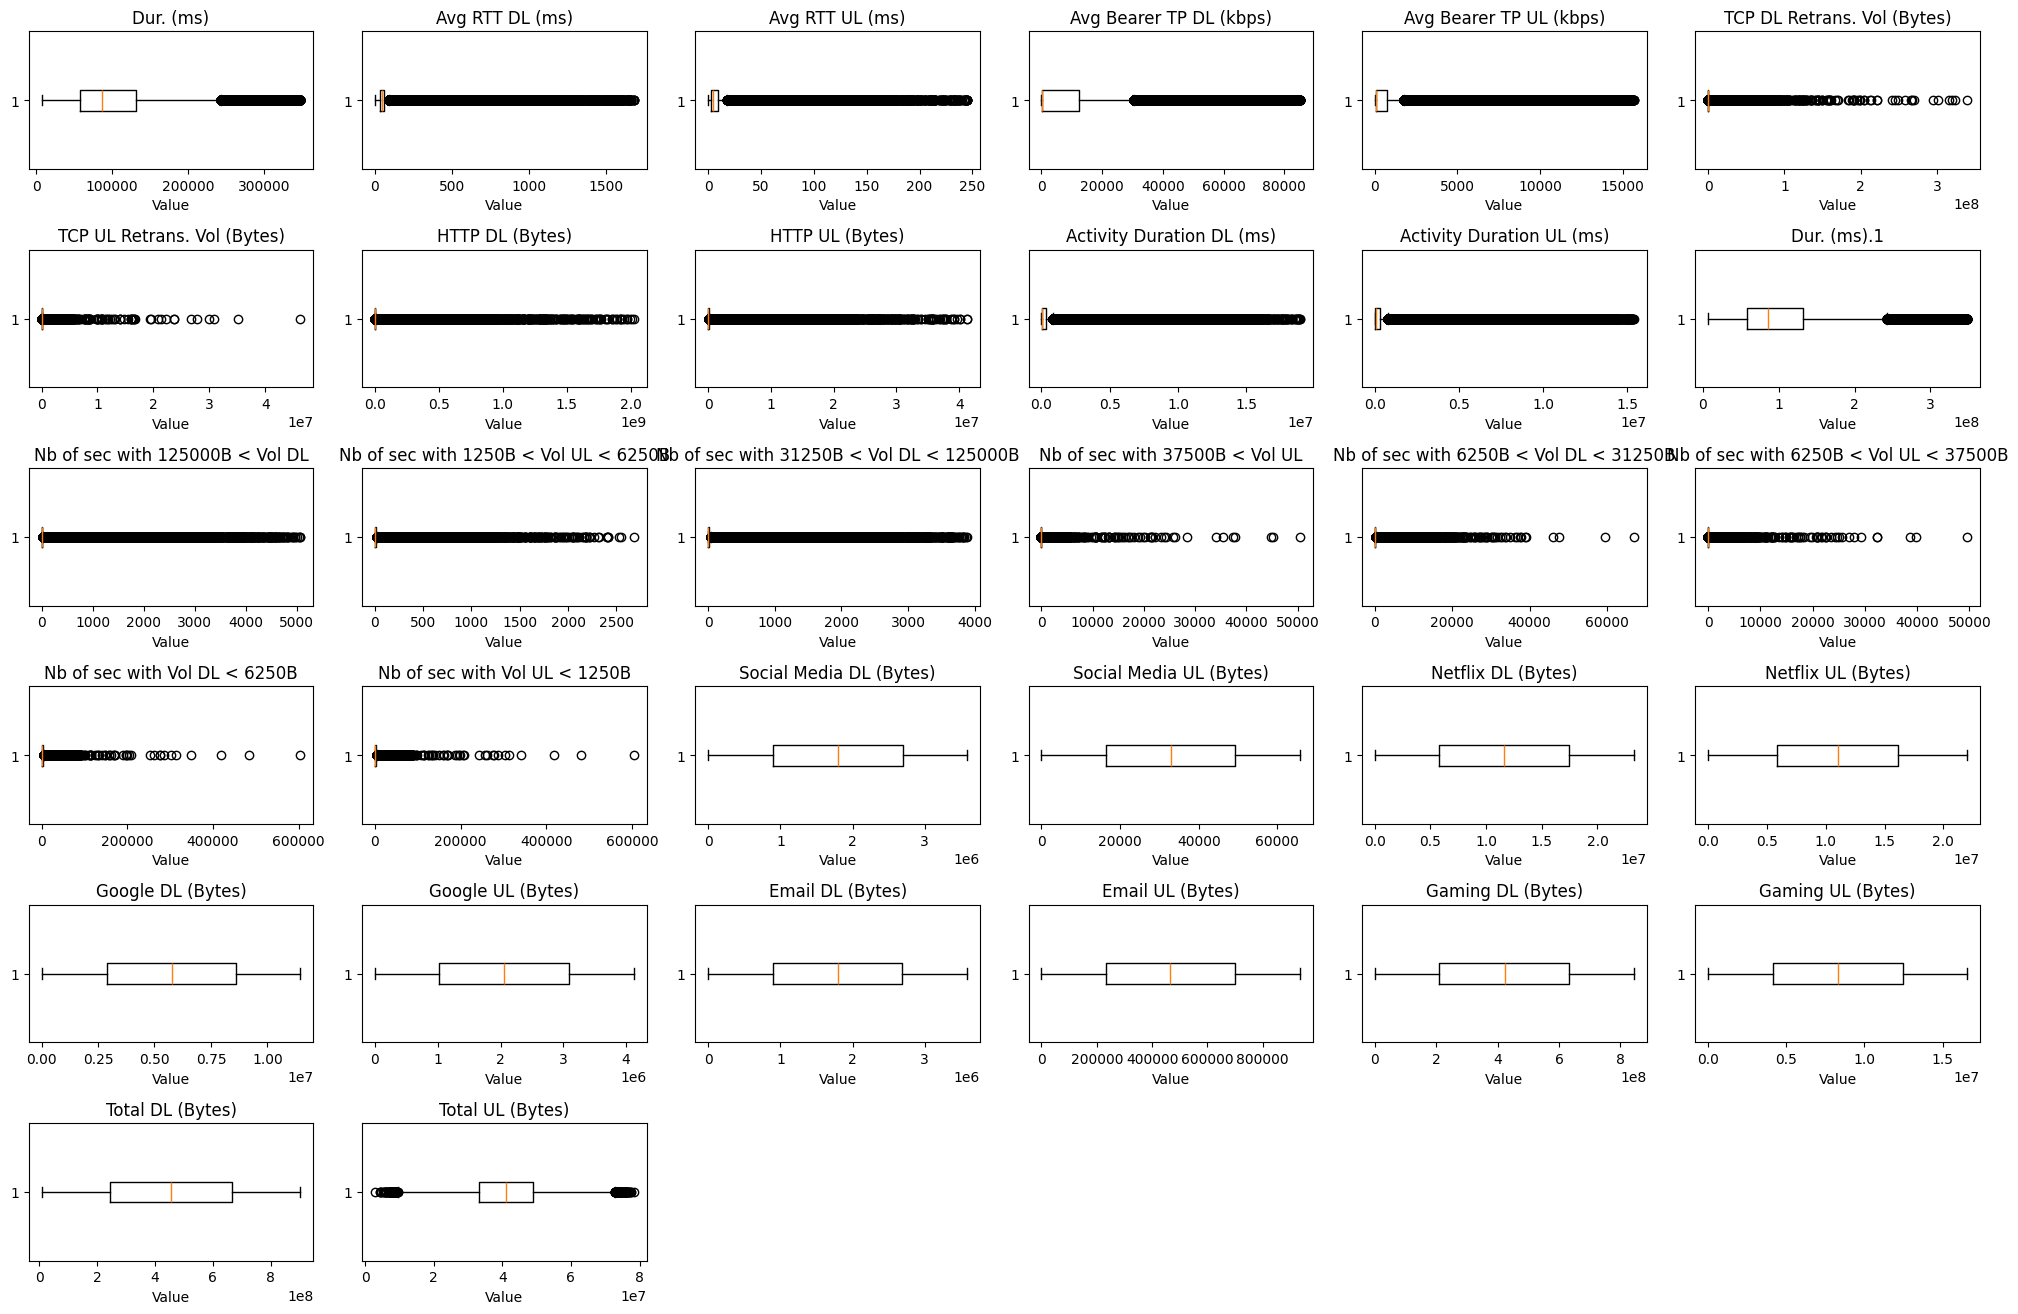

In [25]:
import matplotlib.pyplot as plt

# Define the numerical columns for plotting
numerical_columns = ['Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
                     'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 
                     'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                     'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 
                     'Activity Duration UL (ms)', 'Dur. (ms).1', 
                     'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
                     'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL',
                     'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B',
                     'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
                     'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                     'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                     'Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 
                     'Gaming UL (Bytes)',  'Total DL (Bytes)', 
                     'Total UL (Bytes)']

# Plot box plots for each numerical column
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(7, 6, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()


In [26]:
df.to_csv('cleaned_data.csv', index=False)


<h1>Visualization</h1>

<h3>Analysis of Basic Metrics</h3>

In [27]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.483460e+05,148346.000000,148284.000000,148284.000000,1.483460e+05,1.482840e+05,1.482840e+05,148284.000000,148284.000000,148284.000000,...,1.483460e+05,1.483460e+05,1.483460e+05,1.482840e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05
mean,1.014659e+19,499.218934,497.413298,101766.491759,2.082016e+14,3.367403e+10,4.697791e+13,69.310691,10.242420,8989.886245,...,1.163445e+07,1.100857e+07,1.162748e+07,1.101615e+07,4.220992e+08,8.290269e+06,4.211656e+08,8.262890e+06,4.112015e+07,4.546996e+08
std,2.893245e+18,288.559368,278.021025,63619.736823,1.525163e+10,4.365336e+07,2.078168e+13,113.177353,17.421061,16241.632796,...,6.711222e+06,6.345554e+06,6.725235e+06,6.133097e+06,2.440025e+08,4.781597e+06,2.431682e+08,4.769352e+06,1.127958e+07,2.441771e+08
min,6.917538e+18,0.000000,0.000000,7142.000000,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,265.000000,58288.250000,2.082014e+14,3.365097e+10,3.546391e+13,34.500000,3.000000,42.000000,...,5.833526e+06,5.515832e+06,5.778898e+06,5.882166e+06,2.105496e+08,4.132224e+06,2.102759e+08,4.143476e+06,3.321763e+07,2.431725e+08
50%,7.349883e+18,499.000000,497.000000,86400.000000,2.082015e+14,3.366383e+10,3.571152e+13,45.000000,5.000000,62.000000,...,1.161727e+07,1.101197e+07,1.164286e+07,1.102737e+07,4.235369e+08,8.293466e+06,4.218711e+08,8.265908e+06,4.114375e+07,4.560177e+08
75%,1.304243e+19,749.000000,731.000000,132129.250000,2.082018e+14,3.368460e+10,4.838251e+13,58.000000,9.000000,12192.000000,...,1.744639e+07,1.651463e+07,1.747121e+07,1.615679e+07,6.332978e+08,1.243214e+07,6.316517e+08,1.238236e+07,4.903338e+07,6.657654e+08
max,1.318654e+19,999.000000,999.000000,348177.000000,2.082522e+14,3.379000e+10,9.900120e+13,1678.000000,245.000000,85279.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


<h3>Non-graphical univariate analysis</h3>

In [28]:
import pandas as pd

# Select numeric columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute mean, standard deviation, skewness, and kurtosis
dispersion_parameters = numerical_columns.describe().loc[['mean', 'std', '50%', '25%', '75%']]

# Compute skewness and kurtosis
skewness = numerical_columns.skew()
kurt = numerical_columns.kurtosis()

# Compute range (min-max)
range_values = numerical_columns.apply(lambda x: x.max() - x.min())

# Compute interquartile range (IQR)
iqr = numerical_columns.quantile(0.75) - numerical_columns.quantile(0.25)

# Add range and IQR to dispersion parameters
dispersion_parameters.loc['Range'] = range_values
dispersion_parameters.loc['IQR'] = iqr

# Add skewness and kurtosis to the result
dispersion_parameters.loc['Skewness'] = skewness
dispersion_parameters.loc['Kurtosis'] = kurt

# Print dispersion parameters
print("Dispersion Parameters:")
print(dispersion_parameters)


Dispersion Parameters:
             Bearer Id    Start ms      End ms      Dur. (ms)          IMSI  \
mean      1.014659e+19  499.218934  497.413298  101766.491759  2.082016e+14   
std       2.893245e+18  288.559368  278.021025   63619.736823  1.525163e+10   
50%       7.349883e+18  499.000000  497.000000   86400.000000  2.082015e+14   
25%       7.349883e+18  250.000000  265.000000   58288.250000  2.082014e+14   
75%       1.304243e+19  749.000000  731.000000  132129.250000  2.082018e+14   
Range     6.269004e+18  999.000000  999.000000  341035.000000  4.205059e+12   
IQR       5.692543e+18  499.000000  466.000000   73841.000000  3.703551e+08   
Skewness  2.142439e-02    0.000499    0.006605       1.229859 -2.692082e+02   
Kurtosis -1.995415e+00   -1.197148   -1.120131       1.901783  7.303760e+04   

          MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
mean       3.367403e+10  4.697791e+13        69.310691        10.242420   
std        4.365336e+07  2.078168e+1

<h3>Graphical Univarient analysis</h3>   

Histograms for continuous variables


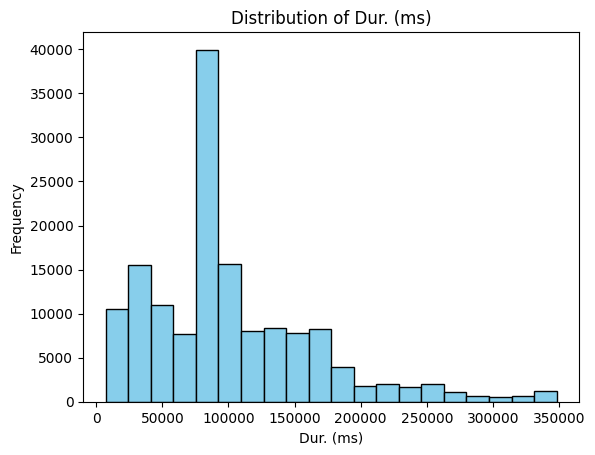

In [29]:
# Histograms for continuous variables
plt.hist(df['Dur. (ms)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Dur. (ms)')
plt.xlabel('Dur. (ms)')
plt.ylabel('Frequency')
plt.show()

Boxplots for continuous variables

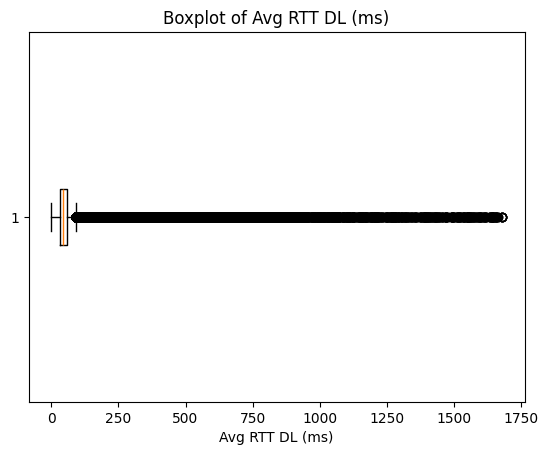

In [30]:
plt.boxplot(df['Avg RTT DL (ms)'].dropna(), vert=False)
plt.title('Boxplot of Avg RTT DL (ms)')
plt.xlabel('Avg RTT DL (ms)')
plt.show()

Bar plots for categorical variables

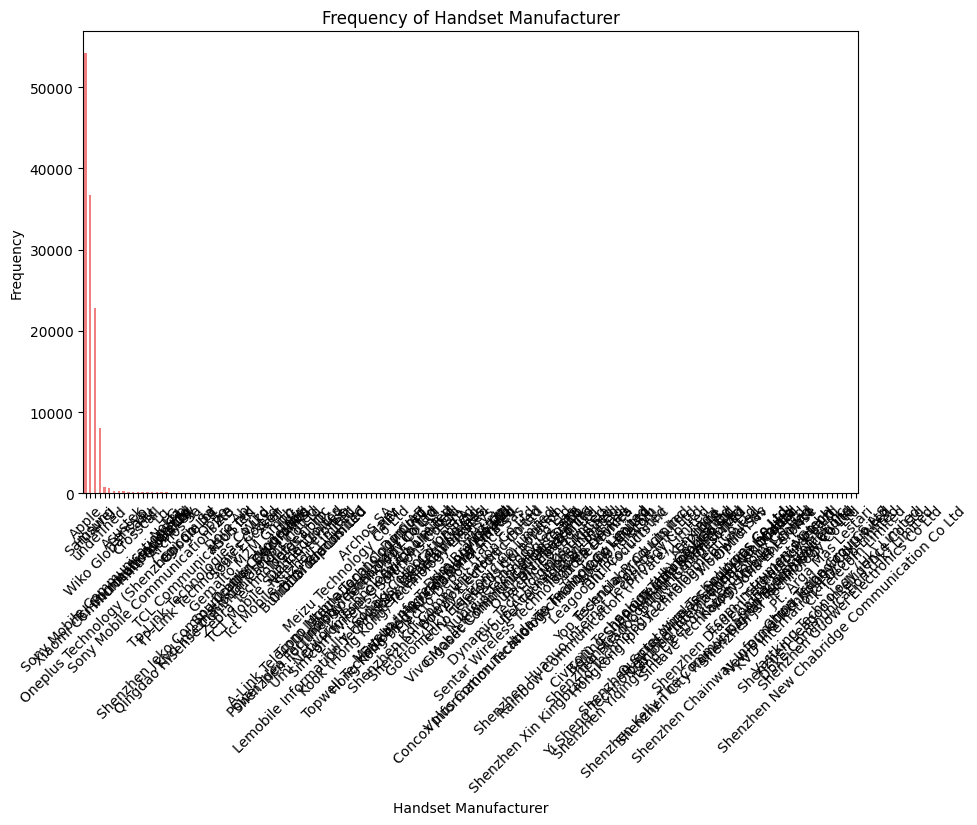

In [31]:
# Bar plot for categorical variables
plt.figure(figsize=(10, 6))
df['Handset Manufacturer'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Handset Manufacturer')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Pie charts for categorical variables

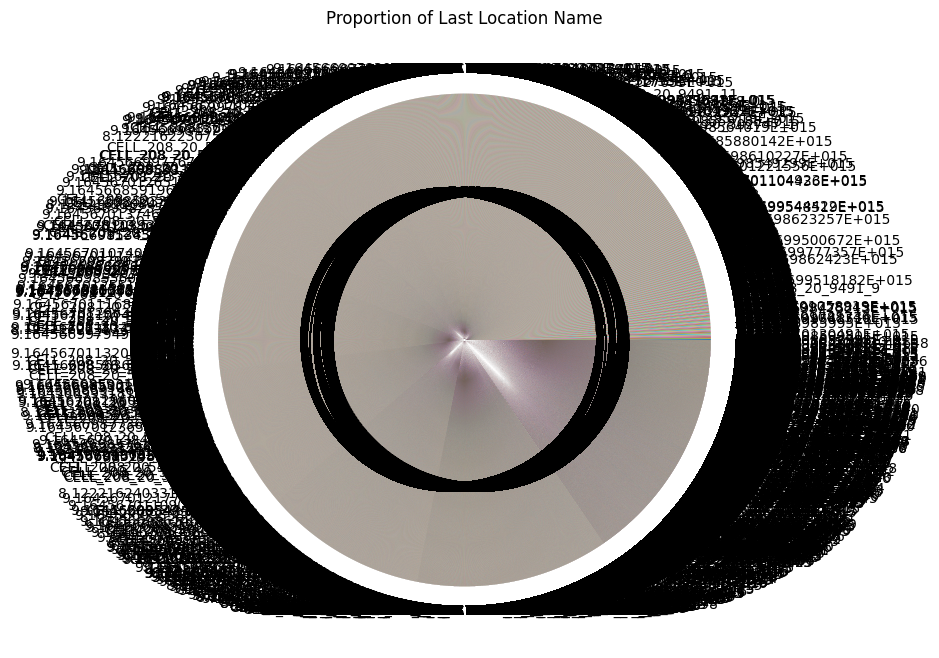

In [32]:
plt.figure(figsize=(8, 8))
df['Last Location Name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Last Location Name')
plt.ylabel('')
plt.show()


Scatter plot 

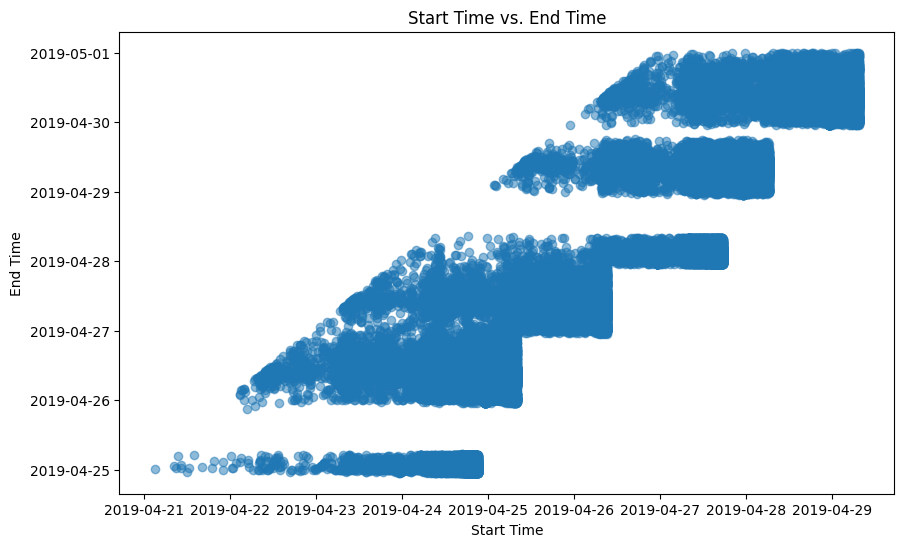

In [35]:

# Convert 'Start' and 'End' columns to datetime objects
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Start'], df['End'], alpha=0.5)
plt.title('Start Time vs. End Time')
plt.xlabel('Start Time')
plt.ylabel('End Time')
plt.show()


Density plots for continuous variables

C:\Users\dell\AppData\Local\Temp\ipykernel_19440\3831172627.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Activity Duration DL (ms)'], shade=True, color='salmon')


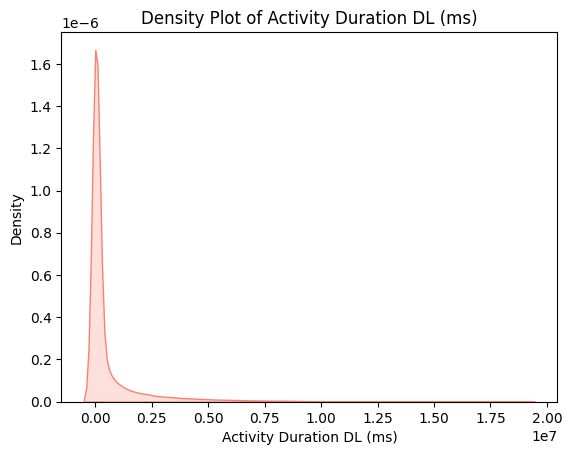

In [36]:
import seaborn as sns

# Density plot for continuous variables
sns.kdeplot(df['Activity Duration DL (ms)'], shade=True, color='salmon')
plt.title('Density Plot of Activity Duration DL (ms)')
plt.xlabel('Activity Duration DL (ms)')
plt.ylabel('Density')
plt.show()


Scatter plots for exploring relationships

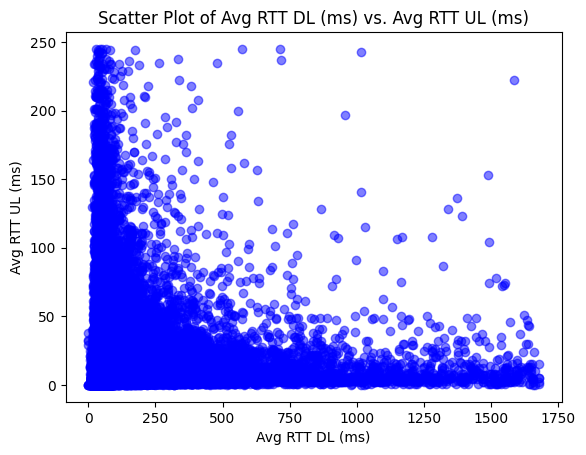

In [37]:
plt.scatter(df['Avg RTT DL (ms)'], df['Avg RTT UL (ms)'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Avg RTT DL (ms) vs. Avg RTT UL (ms)')
plt.xlabel('Avg RTT DL (ms)')
plt.ylabel('Avg RTT UL (ms)')
plt.show()

Violin plots for distribution and summary statistics

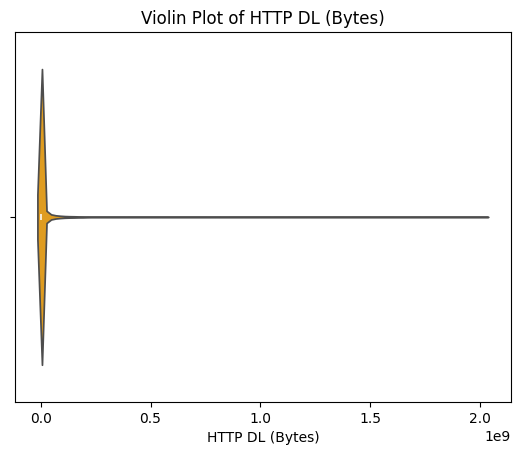

In [38]:
# Violin plot for distribution and summary statistics
sns.violinplot(x='HTTP DL (Bytes)', data=df, color='orange')
plt.title('Violin Plot of HTTP DL (Bytes)')
plt.xlabel('HTTP DL (Bytes)')
plt.show()


Bivarient


Scatter plots for DL and UL data

In [43]:
# Scatter plots
plt.figure(figsize=(12, 8))

# Plot for total DL data
plt.subplot(2, 1, 1)
plt.scatter(df['Social Media DL (Bytes)'], df['Total DL (Bytes)'], alpha=0.5, color='blue', label='Social Media')
plt.scatter(df['Youtube DL (Bytes)'], df['Total DL (Bytes)'], alpha=0.5, color='red', label='YouTube')
plt.scatter(df['Netflix DL (Bytes)'], df['Total DL (Bytes)'], alpha=0.5, color='green', label='Netflix')
plt.xlabel('Application DL Data')
plt.ylabel('Total DL Data')
plt.title('Scatter Plot of Application DL Data vs. Total DL Data')
plt.legend()

# Plot for total UL data
plt.subplot(2, 1, 2)
plt.scatter(df['Social Media UL (Bytes)'], df['Total UL (Bytes)'], alpha=0.5, color='blue', label='Social Media')
plt.scatter(df['Youtube DL (Bytes)'], df['Total DL (Bytes)'], alpha=0.5, color='red', label='YouTube')
plt.scatter(df['Netflix UL (Bytes)'], df['Total UL (Bytes)'], alpha=0.5, color='green', label='Netflix')
plt.xlabel('Application UL Data')
plt.ylabel('Total UL Data')
plt.title('Scatter Plot of Application UL Data vs. Total UL Data')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_19440\3125524841.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Correlation analysis

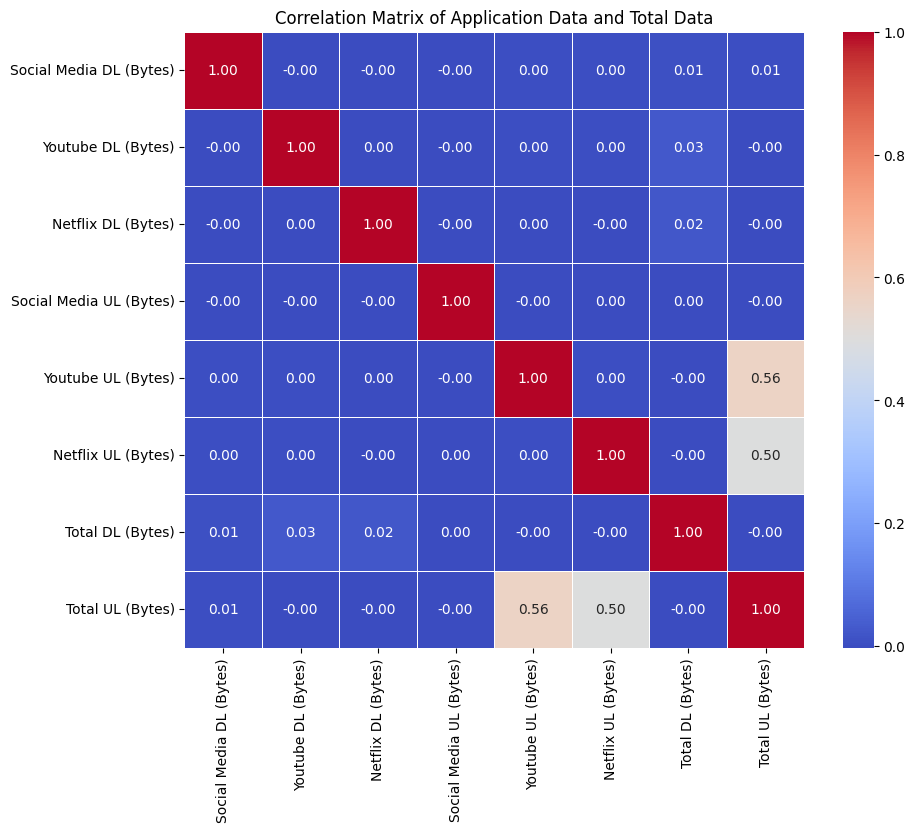

In [44]:

# Correlation analysis
correlation_matrix = df[['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)',
                         'Social Media UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)',
                         'Total DL (Bytes)', 'Total UL (Bytes)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Application Data and Total Data')
plt.show()


Variable Transformations:

In [48]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with the necessary columns

# Step 1: Calculate total duration for all sessions per user
total_duration_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].sum()

# Step 2: Segment users into decile classes based on total duration
deciles = pd.qcut(total_duration_per_user, q=10, labels=False, duplicates='drop')

# Step 3: Compute total data (DL+UL) for each decile class
df['Total Data (DL+UL)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df['Decile'] = deciles
total_data_per_decile = df.groupby('Decile')['Total Data (DL+UL)'].sum()

# Display total data per decile class
print("Total Data (DL+UL) per Decile Class:")
print(total_data_per_decile)


Total Data (DL+UL) per Decile Class:
Series([], Name: Total Data (DL+UL), dtype: float64)


Correlation Analysis

In [49]:
# Select the required columns
selected_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                    'Google DL (Bytes)', 'Google UL (Bytes)',
                    'Email DL (Bytes)', 'Email UL (Bytes)',
                    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                    'Other DL (Bytes)', 'Other UL (Bytes)']

# Compute the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000452   
Social Media UL (Bytes)                -0.000452                 1.000000   
Google DL (Bytes)                      -0.002067                 0.003769   
Google UL (Bytes)                       0.000008                 0.000755   
Email DL (Bytes)                        0.005157                 0.004578   
Email UL (Bytes)                       -0.002498                -0.001153   
Youtube DL (Bytes)                     -0.001308                -0.001672   
Youtube UL (Bytes)                      0.002218                -0.002178   
Netflix DL (Bytes)                     -0.001382                -0.001006   
Netflix UL (Bytes)                      0.002976                 0.000366   
Gaming DL (Bytes)                       0.001639                 0.000390   
Gaming UL (Bytes)                       0.003336        

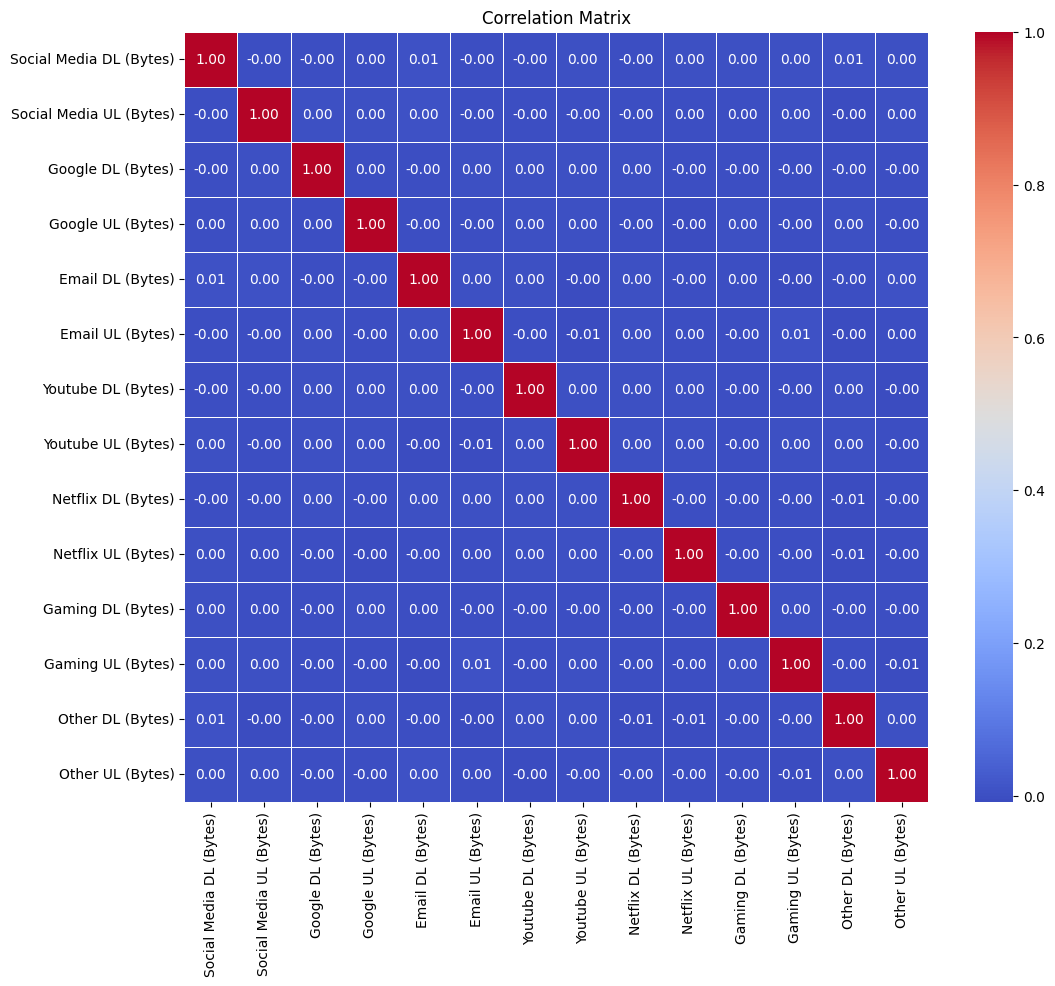

In [66]:
import seaborn as sns

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Dimensionality Reduction

In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


numeric_df = df.select_dtypes(include=['number'])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
numeric_df_imputed_values = imputer.fit_transform(numeric_df)
extra_column = np.zeros((numeric_df_imputed_values.shape[0], 1))
numeric_df_imputed_values_with_extra_column = np.hstack((numeric_df_imputed_values, extra_column))

numeric_df_imputed = pd.DataFrame(numeric_df_imputed_values_with_extra_column, columns=numeric_df.columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df_imputed)


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Decile']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


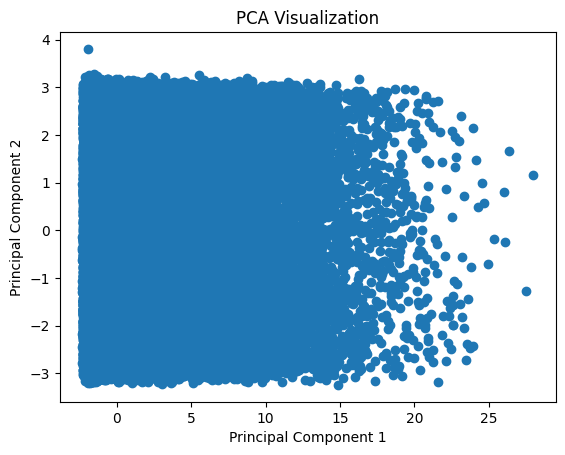

In [65]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_data = pca.fit_transform(scaled_data)

# Plot PCA results
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()
